### Step - 1: Data Extraction and Exploration



In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [96]:
df1 = pd.read_csv("data/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [97]:
df1.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [98]:
df1["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [99]:
df1["balcony"].unique()

array([ 1.,  3., nan,  2.,  0.])

In [100]:
df1["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [101]:
df1["society"].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

### Step - 2: Data Wrangling


In [102]:
df2 = df1.drop(columns = ["area_type", "society", "availability", "balcony"], axis = 1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [103]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [104]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [105]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [106]:
df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

df3[~df3["total_sqft"].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [18]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(convert_sqft_to_num)
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [19]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [20]:
df4["total_sqft"].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [21]:
df4.dtypes

location       object
size           object
total_sqft    float64
bath          float64
price         float64
bhk             int64
dtype: object

### Step - 3: Feature Engineering

In [22]:
#Creating price_per_sqft column

df5 = df4.copy()
df5["price_per_sqft"] = (df5['price']*100000)/df5['total_sqft']   #Price is in Lakhs(INR)
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [23]:
df5['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [24]:
len(df5["location"])

13246

In [25]:
df5["location"] = df5["location"].apply(lambda x: x.strip())

location_stats = df5.groupby("location")["location"].count()
location_stats.sort_values(ascending = False)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [26]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10.sort_values(ascending = False)

location
Sector 1 HSR Layout     10
Dairy Circle            10
Sadashiva Nagar         10
Nagadevanahalli         10
Naganathapura           10
                        ..
KG Halli                 1
KHB Colony Extension     1
KPC Layout               1
Kalasipalya              1
whitefiled               1
Name: location, Length: 1052, dtype: int64

In [27]:
len(location_stats_less_than_10)

1052

In [28]:
df5["location"] = df5["location"].apply(lambda x: "other" if x in location_stats_less_than_10 else x)
len(df5["location"].unique())

242

In [29]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


### Step - 4: Outlier Detection and Removal

#### a) Detecting the outliers in total_sqft area and size


In [30]:
sqft_per_bhk = df5["total_sqft"]/df5["bhk"]
sqft_per_bhk.describe()

count    13200.000000
mean       573.847262
std        388.079980
min          0.250000
25%        473.000000
50%        552.000000
75%        625.000000
max      26136.000000
dtype: float64

In [31]:
df5[df5["total_sqft"]/df5["bhk"] < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [32]:
len(df5[df5["total_sqft"]/df5["bhk"] < 300])

744

In [33]:
df6 = df5[~(df5["total_sqft"]/df5["bhk"] < 300)]
df6.shape

(12502, 7)

#### b) Detecting the outliers in price_per_sqft column

In [34]:
df6["price_per_sqft"].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
def outlier_removal_pps(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby("location"):
    m = np.mean(subdf["price_per_sqft"])
    st = np.std(subdf["price_per_sqft"])
    reduced_df = subdf[(subdf["price_per_sqft"] > (m-st)) & (subdf["price_per_sqft"] <= (m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index=True)
  return df_out

df7 = outlier_removal_pps(df6)
df7.shape


(10241, 7)

#### c) Analyzing Price_per_sqft and Total_sqft area by Location




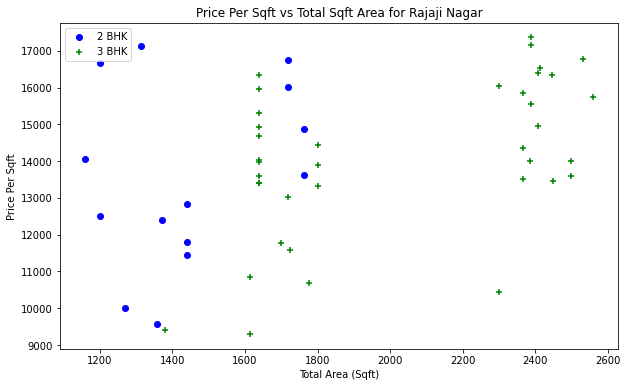

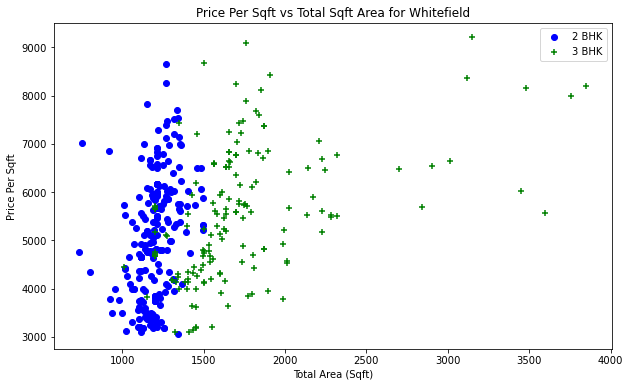

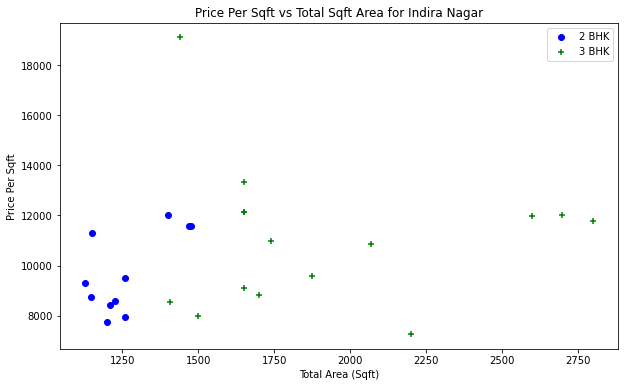

In [36]:
def plot_scatter_chart(df, location):
  bhk2 = df[(df["location"] == location) & (df["bhk"] == 2)]
  bhk3 = df[(df["location"] == location) & (df["bhk"] == 3)]
  plt.figure(figsize=(10,6))
  plt.scatter(bhk2["total_sqft"], bhk2["price_per_sqft"], color = "blue", label = "2 BHK")
  plt.scatter(bhk3["total_sqft"], bhk3["price_per_sqft"], color = "green", marker = "+", label = "3 BHK")
  plt.xlabel("Total Area (Sqft)")
  plt.ylabel("Price Per Sqft")
  plt.title(f"Price Per Sqft vs Total Sqft Area for {location}")
  plt.legend()
  plt.show()

plot_scatter_chart(df7, "Rajaji Nagar")
plot_scatter_chart(df7, "Whitefield")
plot_scatter_chart(df7, "Indira Nagar")

In [37]:
def outlier_removal_bhk(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby("location"):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby("bhk"):
      bhk_stats[bhk] = {
          "mean": np.mean(bhk_df["price_per_sqft"]),
          "std": np.std(bhk_df["price_per_sqft"]),
          "count": bhk_df.shape[0]
          }
    for bhk, bhk_df in location_df.groupby("bhk"):
      stats = bhk_stats.get(bhk-1)                   #returns None when bhk-1 doesn't exist
      if stats and stats["count"] > 5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df["price_per_sqft"] < (stats["mean"])].index.values)
        df_out = df.drop(exclude_indices, axis = "index")
  return df_out

df8 = outlier_removal_bhk(df7)
df8.shape

(7329, 7)

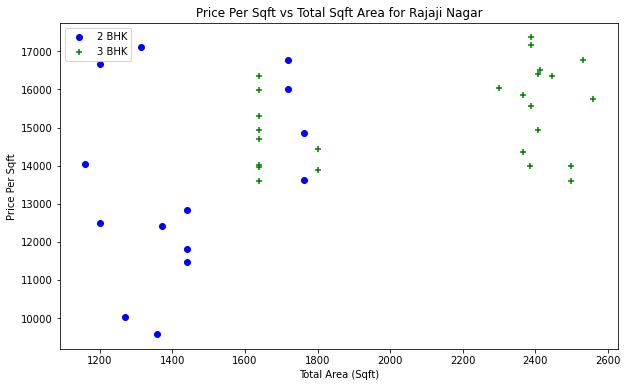

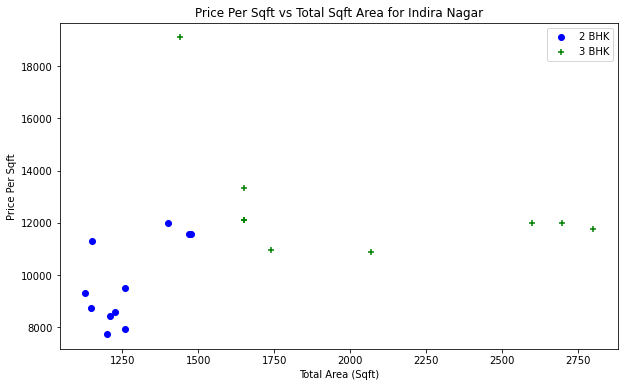

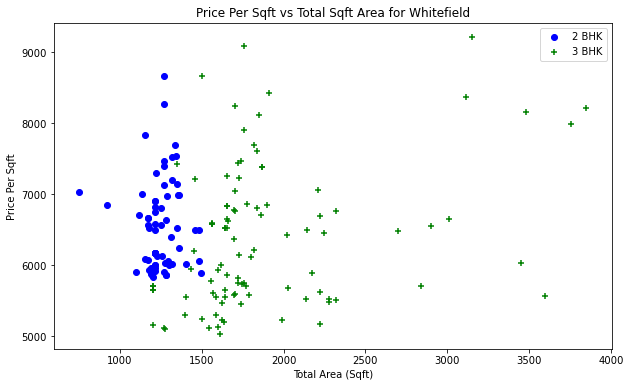

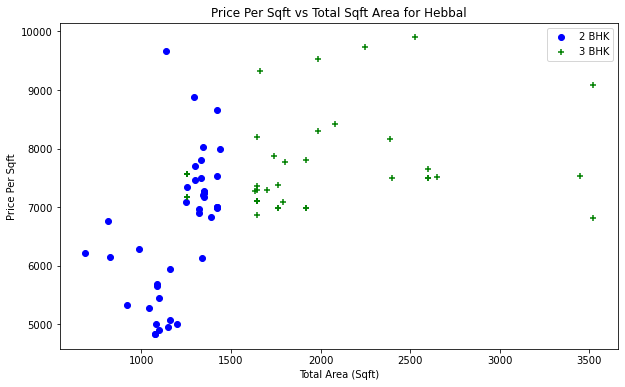

In [38]:
plot_scatter_chart(df8, "Rajaji Nagar")
plot_scatter_chart(df8, "Indira Nagar")
plot_scatter_chart(df8, "Whitefield")
plot_scatter_chart(df8, "Hebbal")

#### d) Plotting the distribution of properties over Price_per_sqft

Text(0.5, 1.0, 'Property Distribution')

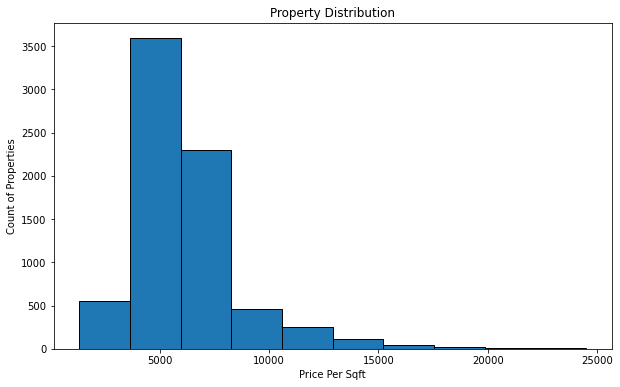

In [39]:
plt.figure(figsize=(10,6))
plt.hist(df8["price_per_sqft"], edgecolor="black")
plt.xlabel("Price Per Sqft")
plt.ylabel("Count of Properties")
plt.title("Property Distribution")


#### e) Analyzing the Bathroom feature

In [40]:
df8["bath"].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [41]:
df8[df8["bath"] > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


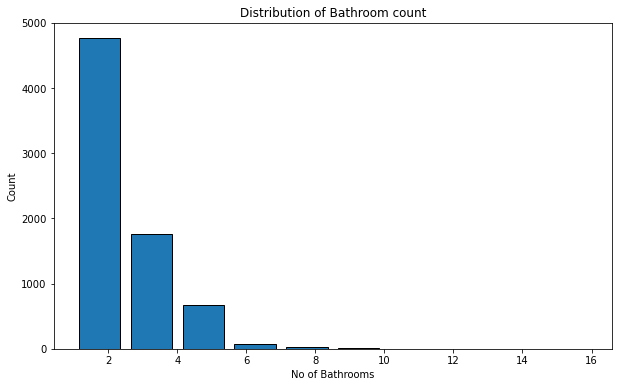

In [42]:
plt.figure(figsize=(10,6))
plt.hist(df8["bath"], rwidth = 0.8, edgecolor="black")
plt.title("Distribution of Bathroom count")
plt.xlabel("No of Bathrooms")
plt.ylabel("Count")
plt.show()

In [43]:
df8[df8["bath"] > df8["bhk"]+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [44]:
df9 = df8[df8["bath"] < df8["bhk"]+2]
df9.shape

(7251, 7)

### Step - 5: Feature Engineering - 2


In [45]:
df10 = df9.drop(columns = ["size", "price_per_sqft"], axis = 1)
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [52]:
corr_matrix = df10.corr()
print(corr_matrix["price"].sort_values(ascending = False))

price         1.000000
total_sqft    0.840997
bath          0.601308
bhk           0.570145
Name: price, dtype: float64


### Model Development

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline


#### a) Performing One-hot Encoding on Location feature

In [54]:
dummies = pd.get_dummies(df10["location"]).astype("int")
#dummies.drop("other", axis = "columns", inplace = True)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df11 = pd.concat([df10, dummies], axis = "columns")
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df12 = df11.drop("location", axis = 1)
df12.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df12.shape

(7251, 246)

In [58]:
X = df12.drop("price", axis = 1)
y = df12["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.867861595414362

In [59]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
print(cross_val_score(LinearRegression(), X, y, cv = cv).mean())
cross_val_score(LinearRegression(), X, y, cv = cv)

0.8183576732393083


array([0.82433488, 0.77166234, 0.85089567, 0.80836261, 0.83653286])

In [60]:
y_pred = lr.predict(X_test)
y_pred[0:5]

array([ 70.16253662,  85.03413391,  51.26786804, 199.80754089,
       124.21537781])

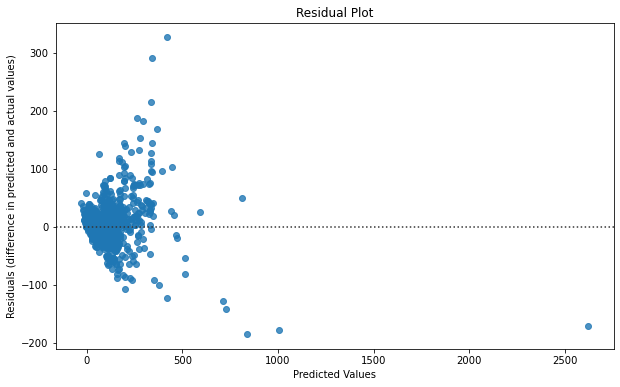

In [61]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.residplot(x = y_pred, y = (y_test - y_pred))
plt.ylabel("Residuals (difference in predicted and actual values)")
plt.xlabel("Predicted Values")
plt.title("Residual Plot")
plt.show()


#### b) Experimenting with different Algorithms to find the best performing model



In [80]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor


def best_model_using_gridsearchcv(X, y):
  algos = {
      "linear_regression": {
          "model": Pipeline([("scaler", StandardScaler()), ("estimator", LinearRegression())]),
          "params":{"scaler": [StandardScaler(), 'passthrough']}
      },
      "lasso": {
          "model": Lasso(),
          "params":{"alpha" : [1, 2], "selection": ['random', 'cyclic']}
      },
      "ridge": {
           "model": Pipeline([("poly", PolynomialFeatures()), ("estimator", Ridge())]),
          "params":{"poly__degree": [1] , "estimator__alpha": [0.1, 1]}
      },
      "decision_tree_regressor": {
          "model": DecisionTreeRegressor(),
          "params":{"criterion" : ['mse', 'friedman_mse'], "splitter": ['best', 'random']}
      }
  }
  scores = []
  cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
  for algo, config in algos.items():
    grid = GridSearchCV(config["model"], config["params"], cv = cv, return_train_score = False)
    grid.fit(X, y)
    scores.append({
        "model": algo,
        "best_score": grid.best_score_,
        "best_params": grid.best_params_
    })
  return pd.DataFrame(scores, columns = ["model", "best_score", "best_params"])


In [82]:
import warnings
warnings.filterwarnings("ignore")

best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.818358,{'scaler': 'passthrough'}
1,lasso,0.699273,"{'alpha': 1, 'selection': 'cyclic'}"
2,ridge,0.819449,"{'estimator__alpha': 1, 'poly__degree': 1}"
3,decision_tree_regressor,0.762665,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


#### c) Using the Linear Regression model (lr) to predict prices

In [83]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=245)

In [84]:
def predict_price(location, sqft, bath, bhk):
  loc_index = np.where(X.columns==location)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bhk
  if loc_index >= 0:
    x[loc_index] = 1
  return lr.predict([x])[0]


In [85]:
predict_price("Indira Nagar", 2500, 2, 3)

287.68727111816406

In [86]:
predict_price("Hebbal", 2500, 3, 3)

196.88111877441406

In [87]:
predict_price("Ulsoor", 2500, 3, 3)

216.16470336914062

In [88]:
predict_price("Whitefield", 2500, 3, 3)

181.9451446533203

In [89]:
predict_price("1st Block Jayanagar", 1000, 2, 2)

175.46286010742188

#### d) Exporting the Model as a Pickle file for hosting it in the website


In [90]:
import pickle

with open("Blr_house_price_prediction_model.pkl", "wb") as file:
  pickle.dump(lr, file)

#### e) Exporting the columns as a json file

In [105]:
import json

columns = {
    "data columns": [col.lower() for col in X.columns]
}
with open("columns_blr.json", "w") as f:
  f.write(json.dumps(columns))

---

_This notebook was created and authored by Ramya Vijayalayan for educational and portfolio use only._  
© 2025 Ramya Vijayalayan | [github.com/ramyavijayalayan-portfolio](https://github.com/ramyavijayalayan10)